In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## Loading geojson files for both Boston and the Districts

In [3]:
boston = gpd.read_file("Boston_census_tract.geojson")

In [4]:
boston.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geoid20     207 non-null    object  
 1   countyfp20  207 non-null    object  
 2   namelsad20  207 non-null    object  
 3   statefp20   207 non-null    object  
 4   tractce20   207 non-null    object  
 5   intptlat20  207 non-null    object  
 6   name20      207 non-null    object  
 7   funcstat20  207 non-null    object  
 8   intptlon20  207 non-null    object  
 9   mtfcc20     207 non-null    object  
 10  aland20     207 non-null    int32   
 11  awater20    207 non-null    int32   
 12  objectid    207 non-null    int32   
 13  geometry    207 non-null    geometry
dtypes: geometry(1), int32(3), object(10)
memory usage: 20.3+ KB


<Axes: >

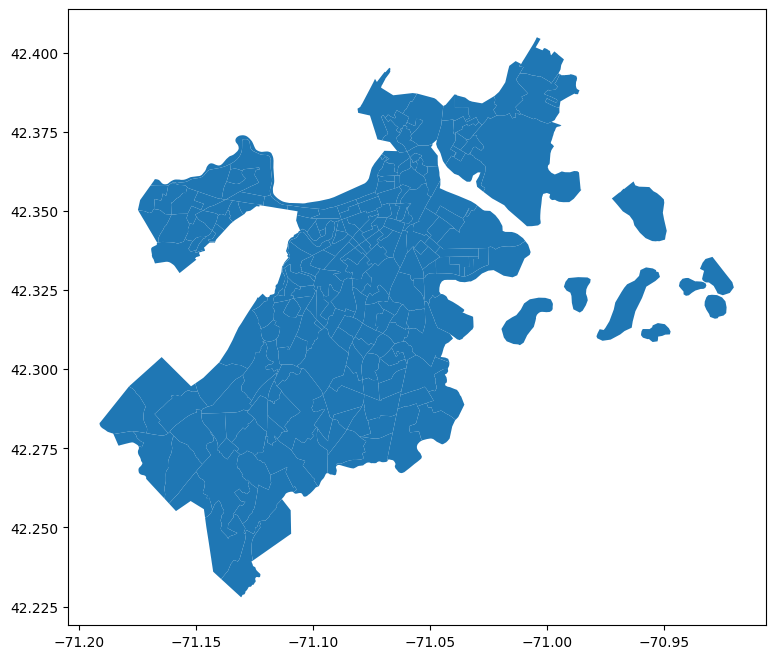

In [6]:
boston.plot(figsize=(10, 8))

In [7]:
districts = gpd.read_file("Districts_census_tract.geojson")
districts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   OBJECTID_12     9 non-null      int32   
 1   LONGNAME        9 non-null      object  
 2   SHORTNAME       9 non-null      object  
 3   DISTRICT        9 non-null      int32   
 4   Councilor       9 non-null      object  
 5   Webpage         9 non-null      object  
 6   Bio             9 non-null      object  
 7   Image           9 non-null      object  
 8   GlobalID        9 non-null      object  
 9   CreationDate    9 non-null      object  
 10  Creator         9 non-null      object  
 11  EditDate        9 non-null      object  
 12  Editor          9 non-null      object  
 13  IMG_RESIZE      0 non-null      object  
 14  electionballot  9 non-null      object  
 15  geometry        9 non-null      geometry
dtypes: geometry(1), int32(2), object(13)
memory usage: 1.2+ KB

<Axes: >

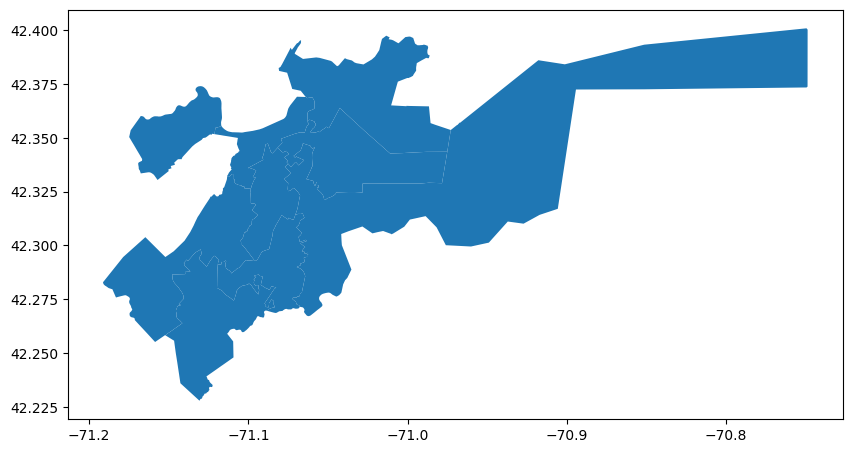

In [8]:
districts.plot(figsize=(10, 8))

In [14]:
# Filtering out data that is only in district 7 
district_7 = districts[districts['DISTRICT'] == 7]

## Looking for intersections between boston city and district 7

In [16]:
intersection = gpd.sjoin(boston, district_7, how='inner', predicate='intersects')

In [17]:
intersection.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 45 entries, 6 to 205
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   geoid20         45 non-null     object  
 1   countyfp20      45 non-null     object  
 2   namelsad20      45 non-null     object  
 3   statefp20       45 non-null     object  
 4   tractce20       45 non-null     object  
 5   intptlat20      45 non-null     object  
 6   name20          45 non-null     object  
 7   funcstat20      45 non-null     object  
 8   intptlon20      45 non-null     object  
 9   mtfcc20         45 non-null     object  
 10  aland20         45 non-null     int32   
 11  awater20        45 non-null     int32   
 12  objectid        45 non-null     int32   
 13  geometry        45 non-null     geometry
 14  index_right     45 non-null     int64   
 15  OBJECTID_12     45 non-null     int32   
 16  LONGNAME        45 non-null     object  
 17  SHORTNAME     

In [18]:
# Looking for unique values in the intersection
geoid20_intersections = intersection['geoid20'].unique()

In [19]:
print(geoid20_intersections)

['25025080601' '25025010403' '25025070700' '25025010300' '25025981100'
 '25025120201' '25025980300' '25025010404' '25025010405' '25025080100'
 '25025120301' '25025071101' '25025091300' '25025010500' '25025110105'
 '25025010206' '25025081301' '25025081302' '25025070502' '25025082100'
 '25025010600' '25025070600' '25025080300' '25025080401' '25025080500'
 '25025080801' '25025080900' '25025081400' '25025081500' '25025081700'
 '25025081800' '25025081900' '25025082000' '25025090100' '25025090200'
 '25025090300' '25025090400' '25025090600' '25025090700' '25025091400'
 '25025092400' '25025070902' '25025070802' '25025070801' '25025070901']


## Modifying the census tracts

The instructions given for modification are:

**GEOID** for boston city, suffolk county is in the form - **25025XXXXXX**
- the last **6** digits denoted by **XXXXXX** is the census tract
- for filtering census data, the tracts are in this form - **X.XX** (for eg: 203.04)
- to get the census tract for usage, add a decimal after **2** digits from right

In [20]:
# Function to transform GEOID to census tract
def geoid_to_tract(geoid):
    tract = geoid[-6:]  # Extracting the last 6 digits
    formatted_tract = f"{tract[:-2]}.{tract[-2:]}"  # Insert a decimal after 4th digit
    return formatted_tract

tracts_for_filtering = [geoid_to_tract(geoid) for geoid in geoid20_intersections]
print(tracts_for_filtering)

['0806.01', '0104.03', '0707.00', '0103.00', '9811.00', '1202.01', '9803.00', '0104.04', '0104.05', '0801.00', '1203.01', '0711.01', '0913.00', '0105.00', '1101.05', '0102.06', '0813.01', '0813.02', '0705.02', '0821.00', '0106.00', '0706.00', '0803.00', '0804.01', '0805.00', '0808.01', '0809.00', '0814.00', '0815.00', '0817.00', '0818.00', '0819.00', '0820.00', '0901.00', '0902.00', '0903.00', '0904.00', '0906.00', '0907.00', '0914.00', '0924.00', '0709.02', '0708.02', '0708.01', '0709.01']
